[-0.36651292 -0.61621759 -0.66526481 ..., -2.2425636  -2.24257049
 -2.24257739]


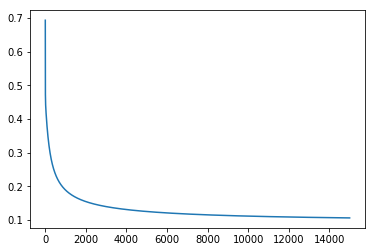

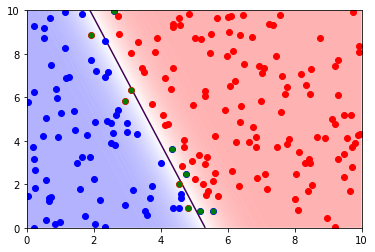

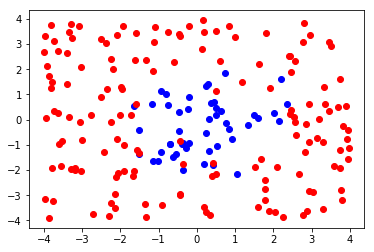

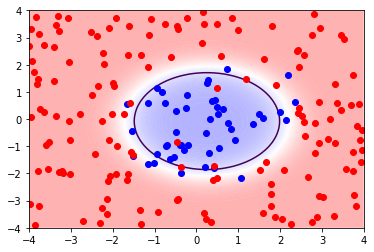

In [5]:

import numpy as np
import matplotlib.pyplot as plt

N = 200

x = np.random.random((N,2))*10

X = np.concatenate((np.ones((N,1)),x),axis=1);
w = np.array([-16,3,1])
z = np.dot(X,w)
h = 1/(1+np.exp(-z))
r = np.random.rand(N)
y = np.zeros(N)
y[r<h] = 1

def sigmoid (X, w):
    z = np.dot(X,w)
    h = 1/(1+np.exp(-z))


    return h

def gradient_descent (X,y,alpha, T):
    n,m=X.shape 
    w=np.zeros(m)
    J=np.zeros(T) 
    for i in range(T):
        h=sigmoid(X,w)         
        w=w-(2*alpha/n)*np.dot((h-y),X)
        J[i]=np.mean(-y*np.log(h)-(1-y)*(np.log(1-h)))
    return w,J

w,J = gradient_descent(X,y,alpha=0.05,T=15000)
plt.plot(J)
print(np.log(J))
plt.show()

r1=np.linspace(0,10,100)
r2=np.linspace(0,10,100)
R1,R2=np.meshgrid(r1,r2)
G1=w[0]+w[1]*R1+w[2]*R2
G1 = 1/(1+np.exp(-G1))

g=sigmoid(X,w)
h=np.zeros(g.shape[0])
h[g<0.5]=0;
h[g>0.5]=1

t=np.logical_xor(y,h)
plt.plot(x[y==0,0],x[y==0,1],'ob')
plt.plot(x[y==1,0],x[y==1,1],'or')
plt.plot(x[t==1,0],x[t==1,1],'oy', marker='o', markersize=5, color="green")
plt.contourf(R1, R2, G1, 100, alpha=0.3, cmap=plt.cm.bwr,antialiased=True)
plt.contour(R1, R2, G1, [0.5])
plt.show()



x = np.random.random((N,2))*8-4

X = np.concatenate((np.ones((N,1)),x,x**2),axis=1);
w = np.array([-4,0,0,1,1])
z = np.dot(X,w)
h = 1/(1+np.exp(-z))
r = np.random.rand(N)
y = np.zeros(N)
y[r<h] = 1
plt.plot(x[y==0,0],x[y==0,1],'ob')
plt.plot(x[y==1,0],x[y==1,1],'or')
plt.show()

w, J=gradient_descent(X,y,alpha=0.01, T=15000)

r1=np.linspace(-4,4,100)
r2=np.linspace(-4,4,100)
R1,R2=np.meshgrid(r1,r2)
G1=w[0]+w[1]*(R1)+w[2]*(R2)+ w[3]*(R1)**2+ w[4]*(R2)**2
G1 = 1/(1+np.exp(-G1))

g=sigmoid(X,w)
h=np.zeros(g.shape[0])

t=np.logical_xor(y,h)
plt.plot(x[y==0,0],x[y==0,1],'ob')
plt.plot(x[y==1,0],x[y==1,1],'or')


plt.contourf(R1, R2, G1, 100, alpha=0.3, cmap=plt.cm.bwr,antialiased=True)
plt.contour(R1, R2, G1, [0.3])
plt.show()